## Setup & Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Load Raw Dataset

Load `application_train.csv` tanpa agregasi dari tabel lain.

In [2]:
# Load raw application_train.csv
df = pd.read_csv('/content/datasets/application_train.csv')

print(f"Data shape: {df.shape}")
print(f"\nTarget distribution:")
print(df['TARGET'].value_counts())
print(f"\nTarget distribution (percentage):")
print(df['TARGET'].value_counts(normalize=True))

df.head()

Data shape: (170843, 122)

Target distribution:
TARGET
0    156934
1     13909
Name: count, dtype: int64

Target distribution (percentage):
TARGET
0    0.918586
1    0.081414
Name: proportion, dtype: float64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Basic Feature Engineering

Feature engineering sederhana dari kolom yang ada di `application_train.csv`.

In [3]:
# Basic Feature Engineering (hanya dari kolom yang ada)

# 1. Credit utilization ratio
if 'AMT_CREDIT' in df.columns and 'AMT_ANNUITY' in df.columns:
    df['CREDIT_ANNUITY_RATIO'] = df['AMT_CREDIT'] / (df['AMT_ANNUITY'] + 1)

# 2. Income to credit ratio
if 'AMT_INCOME_TOTAL' in df.columns and 'AMT_CREDIT' in df.columns:
    df['INCOME_CREDIT_RATIO'] = df['AMT_INCOME_TOTAL'] / (df['AMT_CREDIT'] + 1)

# 3. Annuity to income ratio
if 'AMT_ANNUITY' in df.columns and 'AMT_INCOME_TOTAL' in df.columns:
    df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / (df['AMT_INCOME_TOTAL'] + 1)

# 4. Credit to goods price ratio
if 'AMT_CREDIT' in df.columns and 'AMT_GOODS_PRICE' in df.columns:
    df['CREDIT_GOODS_RATIO'] = df['AMT_CREDIT'] / (df['AMT_GOODS_PRICE'] + 1)

# 5. Days employed to age ratio
if 'DAYS_EMPLOYED' in df.columns and 'DAYS_BIRTH' in df.columns:
    df['EMPLOYED_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / (df['DAYS_BIRTH'] + 1)

# 6. External source features combination
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
if all(col in df.columns for col in ext_sources):
    df['EXT_SOURCE_MEAN'] = df[ext_sources].mean(axis=1)
    df['EXT_SOURCE_MAX'] = df[ext_sources].max(axis=1)
    df['EXT_SOURCE_MIN'] = df[ext_sources].min(axis=1)
    df['EXT_SOURCE_STD'] = df[ext_sources].std(axis=1)

# 7. Days last phone change to age ratio
if 'DAYS_LAST_PHONE_CHANGE' in df.columns and 'DAYS_BIRTH' in df.columns:
    df['PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / (df['DAYS_BIRTH'] + 1)

# 8. Family size income per capita
if 'AMT_INCOME_TOTAL' in df.columns and 'CNT_FAM_MEMBERS' in df.columns:
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / (df['CNT_FAM_MEMBERS'] + 1)

print(f"Shape after feature engineering: {df.shape}")
print(f"New features added: {df.shape[1] - 122}")  # 122 adalah jumlah kolom asli application_train

Shape after feature engineering: (170843, 133)
New features added: 11


## 3. Handling Missing Values

Drop kolom dengan missing > 70%, impute sisanya.

In [4]:
# Calculate missing percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Drop columns with more than 70% missing values
threshold = 70
cols_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

print(f"Dropping {len(cols_to_drop)} columns with > {threshold}% missing values")
print(f"Columns to drop: {cols_to_drop}")

df = df.drop(columns=cols_to_drop)

print(f"\nShape after dropping high missing columns: {df.shape}")

Dropping 0 columns with > 70% missing values
Columns to drop: []

Shape after dropping high missing columns: (170843, 133)


In [5]:
# Separate numeric and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove TARGET and ID from features
if 'TARGET' in numeric_features:
    numeric_features.remove('TARGET')
if 'SK_ID_CURR' in numeric_features:
    numeric_features.remove('SK_ID_CURR')

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Impute missing values
# Numeric: fill with median
for col in numeric_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Categorical: fill with mode or 'Unknown'
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()
        if len(mode_value) > 0:
            df[col].fillna(mode_value[0], inplace=True)
        else:
            df[col].fillna('Unknown', inplace=True)

print(f"\nMissing values after imputation: {df.isnull().sum().sum()}")

Numeric features: 115
Categorical features: 16

Missing values after imputation: 0


## 4. Encoding Categorical Variables

In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical variables
le = LabelEncoder()
label_encoded_cols = []

for col in categorical_features:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoded_cols.append(col)

print(f"Label encoded {len(label_encoded_cols)} categorical columns")
print(f"Encoded columns: {label_encoded_cols}")

Label encoded 16 categorical columns
Encoded columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


## 5. Outlier Handling

In [7]:
# Get numeric columns (excluding TARGET)
numeric_cols_for_outlier = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'TARGET' in numeric_cols_for_outlier:
    numeric_cols_for_outlier.remove('TARGET')
if 'SK_ID_CURR' in numeric_cols_for_outlier:
    numeric_cols_for_outlier.remove('SK_ID_CURR')

# Winsorize outliers using IQR method
outlier_count = 0
for col in numeric_cols_for_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Count outliers before capping
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_count += outliers

    # Cap outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print(f"Total outliers capped: {outlier_count}")
print(f"Processed {len(numeric_cols_for_outlier)} numeric columns")

Total outliers capped: 3272655
Processed 131 numeric columns


## 6. Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Prepare X and y
cols_to_drop_for_model = ['SK_ID_CURR', 'TARGET']
existing_cols_to_drop = [col for col in cols_to_drop_for_model if col in df.columns]

X = df.drop(columns=existing_cols_to_drop)
y = df['TARGET'] if 'TARGET' in df.columns else None

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape if y is not None else 'N/A'}")
print(f"Target distribution:\n{y.value_counts() if y is not None else 'N/A'}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTrain set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Features shape: (170843, 131)
Target shape: (170843,)
Target distribution:
TARGET
0    156934
1     13909
Name: count, dtype: int64

Train set size: (136674, 131)
Test set size: (34169, 131)


## 7. Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Clean column names (remove special characters for XGBoost compatibility)
def clean_column_names(df):
    df.columns = df.columns.str.replace('[', '_', regex=False)
    df.columns = df.columns.str.replace(']', '_', regex=False)
    df.columns = df.columns.str.replace('<', '_', regex=False)
    df.columns = df.columns.str.replace('>', '_', regex=False)
    return df

X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)
X_train_scaled = clean_column_names(X_train_scaled)
X_test_scaled = clean_column_names(X_test_scaled)

print(f"Training data scaled: {X_train_scaled.shape}")
print(f"Test data scaled: {X_test_scaled.shape}")

Training data scaled: (136674, 131)
Test data scaled: (34169, 131)


## 8. SMOTE-ENN untuk Imbalanced Data

In [10]:
from imblearn.combine import SMOTEENN
from collections import Counter

print("Before SMOTE-ENN:")
print(f"Training set size: {X_train_scaled.shape}")
print(f"Class distribution: {Counter(y_train)}")

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE-ENN:")
print(f"Training set size: {X_train_resampled.shape}")
print(f"Class distribution: {Counter(y_train_resampled)}")

# Convert back to DataFrame and clean column names
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train_scaled.columns)
X_train_resampled = clean_column_names(X_train_resampled)
y_train_resampled = pd.Series(y_train_resampled)

Before SMOTE-ENN:
Training set size: (136674, 131)
Class distribution: Counter({0: 125547, 1: 11127})

After SMOTE-ENN:
Training set size: (191186, 131)
Class distribution: Counter({1: 125506, 0: 65680})


## 9. Model Training

### 9.1 Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

start_time = time.time()

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

# Evaluation
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Training completed in 25.33 seconds
ROC-AUC Score: 0.7424
F1-Score: 0.2812

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     31387
           1       0.19      0.53      0.28      2782

    accuracy                           0.78     34169
   macro avg       0.57      0.67      0.58     34169
weighted avg       0.89      0.78      0.82     34169


Confusion Matrix:
[[25127  6260]
 [ 1303  1479]]


### 9.2 XGBoost Classifier

In [12]:
import xgboost as xgb

start_time = time.time()

# Calculate scale_pos_weight
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

# Initialize XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    eval_metric='auc'
)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

# Evaluation
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Training completed in 4.67 seconds
ROC-AUC Score: 0.7499
F1-Score: 0.2879

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     31387
           1       0.27      0.30      0.29      2782

    accuracy                           0.88     34169
   macro avg       0.61      0.62      0.61     34169
weighted avg       0.88      0.88      0.88     34169


Confusion Matrix:
[[29155  2232]
 [ 1939   843]]


### 9.3 TabNet Classifier

In [13]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.8 MB/s eta 0:00:00


In [14]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

start_time = time.time()

# Convert to numpy arrays for TabNet
X_train_tabnet = X_train_resampled.values
y_train_tabnet = y_train_resampled.values
X_test_tabnet = X_test_scaled.values
y_test_tabnet = y_test.values

# Initialize TabNet
tabnet_model = TabNetClassifier(
    n_d=64,
    n_a=64,
    n_steps=5,
    gamma=1.5,
    n_independent=2,
    n_shared=2,
    seed=42,
    verbose=0
)

# Train the model
tabnet_model.fit(
    X_train_tabnet, y_train_tabnet,
    eval_set=[(X_test_tabnet, y_test_tabnet)],
    eval_metric=['auc'],
    max_epochs=100,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128
)

# Predict on test set
y_pred_proba_tabnet = tabnet_model.predict_proba(X_test_tabnet)[:, 1]
y_pred_tabnet = (y_pred_proba_tabnet > 0.5).astype(int)

train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

# Evaluation
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_tabnet):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tabnet):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tabnet))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tabnet))


Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_0_auc = 0.72791
Training completed in 358.48 seconds
ROC-AUC Score: 0.7279
F1-Score: 0.2112

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.46      0.62     31387
           1       0.12      0.84      0.21      2782

    accuracy                           0.49     34169
   macro avg       0.55      0.65      0.42     34169
weighted avg       0.90      0.49      0.59     34169


Confusion Matrix:
[[14406 16981]
 [  449  2333]]


## 10. Stacking Ensemble

In [15]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

# Create meta-features from base model predictions
meta_train = np.column_stack([
    rf_model.predict_proba(X_train_resampled)[:, 1],
    xgb_model.predict_proba(X_train_resampled)[:, 1],
    tabnet_model.predict_proba(X_train_resampled.values)[:, 1]
])

meta_test = np.column_stack([
    y_pred_proba_rf,
    y_pred_proba_xgb,
    y_pred_proba_tabnet
])

# Train meta-learner
meta_model = LogisticRegression(random_state=42, max_iter=1000)
meta_model.fit(meta_train, y_train_resampled)

# Predict using stacking ensemble
y_pred_proba_stack = meta_model.predict_proba(meta_test)[:, 1]
y_pred_stack = (y_pred_proba_stack > 0.5).astype(int)

train_time = time.time() - start_time
print(f"Stacking ensemble completed in {train_time:.2f} seconds")

# Evaluation
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_stack):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_stack):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stack))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))

Stacking ensemble completed in 7.26 seconds
ROC-AUC Score: 0.6984
F1-Score: 0.2746

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     31387
           1       0.19      0.48      0.27      2782

    accuracy                           0.79     34169
   macro avg       0.57      0.65      0.58     34169
weighted avg       0.89      0.79      0.83     34169


Confusion Matrix:
[[25836  5551]
 [ 1456  1326]]


## 11. Model Comparison - Baseline Results

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate metrics for all models
baseline_results = {
    'Model': ['Random Forest', 'XGBoost', 'TabNet', 'Stacking Ensemble'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_tabnet),
        accuracy_score(y_test, y_pred_stack)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_tabnet),
        precision_score(y_test, y_pred_stack)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_tabnet),
        recall_score(y_test, y_pred_stack)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_tabnet),
        f1_score(y_test, y_pred_stack)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_tabnet),
        roc_auc_score(y_test, y_pred_proba_stack)
    ]
}

baseline_df = pd.DataFrame(baseline_results)
baseline_df = baseline_df.round(4)

print("="*80)
print("BASELINE MODEL RESULTS (Raw Dataset Only)")
print("="*80)
print(baseline_df.to_string(index=False))
print("="*80)

# Find best model
print("\nBest Models per Metric:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    best_idx = baseline_df[metric].idxmax()
    best_model = baseline_df.loc[best_idx, 'Model']
    best_score = baseline_df.loc[best_idx, metric]
    print(f"{metric}: {best_model} ({best_score:.4f})")

BASELINE MODEL RESULTS (Raw Dataset Only)
            Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
    Random Forest    0.7787     0.1911  0.5316    0.2812   0.7424
          XGBoost    0.8779     0.2741  0.3030    0.2879   0.7499
           TabNet    0.4899     0.1208  0.8386    0.2112   0.7279
Stacking Ensemble    0.7949     0.1928  0.4766    0.2746   0.6984

Best Models per Metric:
Accuracy: XGBoost (0.8779)
Precision: XGBoost (0.2741)
Recall: TabNet (0.8386)
F1-Score: XGBoost (0.2879)
ROC-AUC: XGBoost (0.7499)


## 12. Visualization - ROC Curve

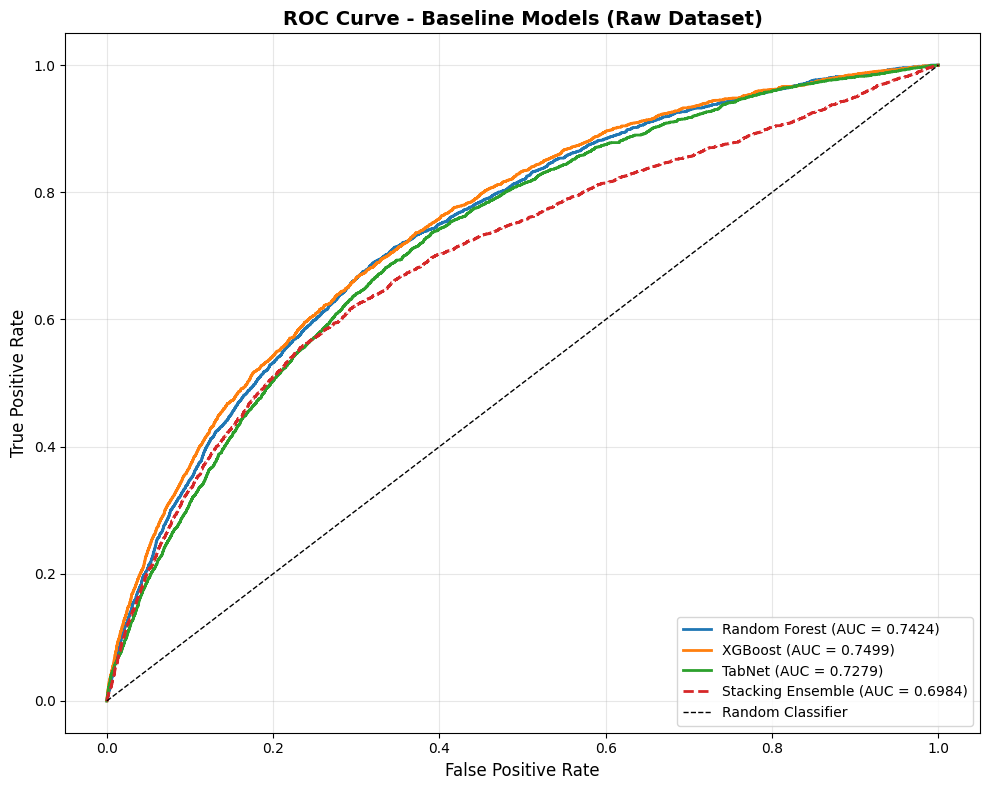

In [17]:
from sklearn.metrics import roc_curve

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.4f})', linewidth=2)

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_pred_proba_xgb):.4f})', linewidth=2)

# TabNet
fpr_tabnet, tpr_tabnet, _ = roc_curve(y_test, y_pred_proba_tabnet)
plt.plot(fpr_tabnet, tpr_tabnet, label=f'TabNet (AUC = {roc_auc_score(y_test, y_pred_proba_tabnet):.4f})', linewidth=2)

# Stacking
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_pred_proba_stack)
plt.plot(fpr_stack, tpr_stack, label=f'Stacking Ensemble (AUC = {roc_auc_score(y_test, y_pred_proba_stack):.4f})', linewidth=2, linestyle='--')

# Diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Baseline Models (Raw Dataset)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 13. Visualization - Metrics Bar Chart

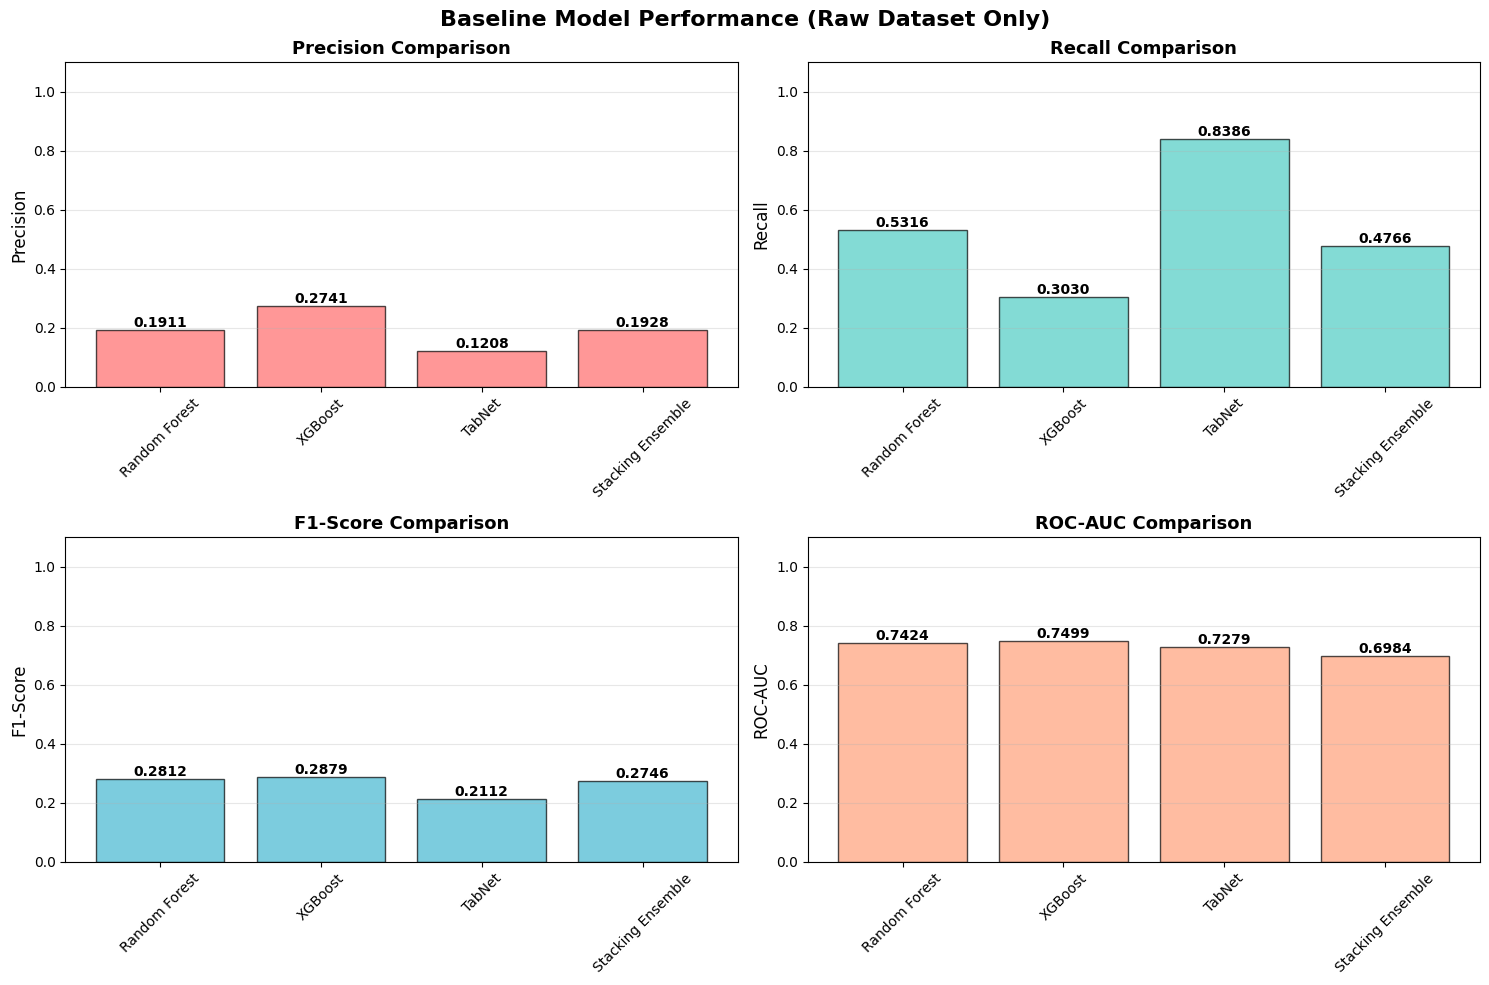

In [18]:
# Bar chart comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Baseline Model Performance (Raw Dataset Only)', fontsize=16, fontweight='bold')

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(baseline_df['Model'], baseline_df[metric], color=colors[idx], alpha=0.7, edgecolor='black')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.set_ylim([0, 1.1])
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 14. Save Baseline Results

In [19]:
import os

# Save baseline results
baseline_df.to_csv('/content/baseline_models/baseline_model_results.csv', index=False)
print("Baseline results saved to 'baseline_models/baseline_model_results.csv'")

# Save feature list for comparison
feature_list = pd.DataFrame({'Feature': X_train.columns.tolist()})
feature_list.to_csv('/content/baseline_models/baseline_features.csv', index=False)
print("Feature list saved to 'baseline_models/baseline_features.csv'")

print(f"\n Total features used in baseline: {len(X_train.columns)}")

Baseline results saved to 'baseline_models/baseline_model_results.csv'
Feature list saved to 'baseline_models/baseline_features.csv'

 Total features used in baseline: 131
